### Vector Autoregression

<p>The Vector Autoregression (VAR) method models the next step in each time series using an AR model. 
It is the generalization of AR to multiple parallel time series, e.g. multivariate time series.

The notation for the model involves specifying the order for the AR(p) model as 
parameters to a VAR function, e.g. VAR(p). </p>

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.ar_model import AR
import warnings
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random
warnings.filterwarnings('ignore')

### Carica i dati e crea dataset per VAR

In [4]:
data = pd.read_csv('/Users/alket/code/PolisEye_Experimentation/data/new_data_backfill_forwfill.csv',index_col = 0)

In [5]:
gbc = data.groupby(by = data['cell_num'])

cell_1 = gbc.get_group('486-1258')
cell_2 = gbc.get_group('498-1268')
cell_3 = gbc.get_group('498-1262')
cell_4 = gbc.get_group('498-1266')
cell_5 = gbc.get_group('498-1267')
cell_6 = gbc.get_group('486-1260')
cell_7 = gbc.get_group('498-1261')
cell_8 = gbc.get_group('498-1263')
cell_9 = gbc.get_group('498-1265')

serie2 = cell_2['nr_people'].tolist()
serie1 = cell_1['nr_people'].tolist()
serie3 = cell_3['nr_people'].tolist()
serie4 = cell_4['nr_people'].tolist()
serie5 = cell_5['nr_people'].tolist()
serie6 = cell_6['nr_people'].tolist()
serie7 = cell_7['nr_people'].tolist()
serie8 = cell_8['nr_people'].tolist()
serie9 = cell_9['nr_people'].tolist()

data = list()
count = 0
for i in range(len(serie1)):        
    v1 = serie1[count] # jeans
    v2 = serie2[count] # Polo shirt 
    v3 = serie3[count] # Shirt 
    v4 = serie4[count]
    v5 = serie5[count]
    v6 = serie6[count]
    v7 = serie7[count]
    v8 = serie8[count]
    v9 = serie9[count]
    count +=1
    row = [v1, v2, v3, v4, v5, v6, v7, v8, v9]
    data.append(row)

### Modello VAR

In [6]:
model = VAR(data)
model_fit = model.fit()

### Dimostra una prima previsione

In [15]:
yhat = model_fit.forecast(model_fit.endog, steps=20) 
print(yhat)

[[33.06493606 32.00441262 14.17307148 15.17330878 94.40175545 33.1157888
  73.45747461 13.99676004 15.02346394]
 [33.11875333 32.06781207 14.27996261 15.29868066 94.73732261 33.21090728
  73.88049496 14.02809684 15.08522604]
 [33.160982   32.15178976 14.3628561  15.40126138 95.05053477 33.28862996
  74.27991591 14.07586683 15.16002753]
 [33.19450086 32.24281502 14.43670339 15.4917005  95.3553313  33.35360335
  74.66034922 14.13176688 15.23779578]
 [33.22229401 32.3359437  14.50656565 15.57467274 95.65558142 33.40973336
  75.024056   14.19163244 15.31458123]
 [33.24673483 32.42924673 14.57400503 15.65234242 95.95193784 33.45993126
  75.37238417 14.25316545 15.38891091]
 [33.26955906 32.52189341 14.63940721 15.72579373 96.2441581  33.50628216
  75.70630883 14.31499468 15.4603125 ]
 [33.29198919 32.61348202 14.70280494 15.79563157 96.53185466 33.55025648
  76.02663919 14.37626098 15.52871368]
 [33.31486518 32.70379801 14.76415665 15.8622389  96.81471002 33.59288225
  76.3340991  14.436415

### Calcola errore di previsone

In [16]:
predicted = []
expected = np.array(data)
expected.shape

for i in range(len(data)):
    yhat = model_fit.forecast(model_fit.endog, steps=20) 
    predicted.append(np.rint(yhat[0]))
    
predicted = np.asarray(predicted)
print(predicted[0:6])
print(expected[0:6])    

[[33. 32. 14. 15. 94. 33. 73. 14. 15.]
 [33. 32. 14. 15. 94. 33. 73. 14. 15.]
 [33. 32. 14. 15. 94. 33. 73. 14. 15.]
 [33. 32. 14. 15. 94. 33. 73. 14. 15.]
 [33. 32. 14. 15. 94. 33. 73. 14. 15.]
 [33. 32. 14. 15. 94. 33. 73. 14. 15.]]
[[ 42.  35.  17.  17. 104.  41.  89.  17.  17.]
 [ 42.  36.  17.  17. 106.  41.  91.  17.  17.]
 [ 40.  36.  17.  17. 107.  40.  89.  17.  17.]
 [ 39.  35.  17.  17. 106.  38.  88.  16.  17.]
 [ 37.  35.  17.  17. 105.  37.  88.  16.  16.]
 [ 37.  35.  17.  17. 105.  36.  88.  16.  17.]]


### Visualizza grafico errore per ogni cella

(11808, 9)


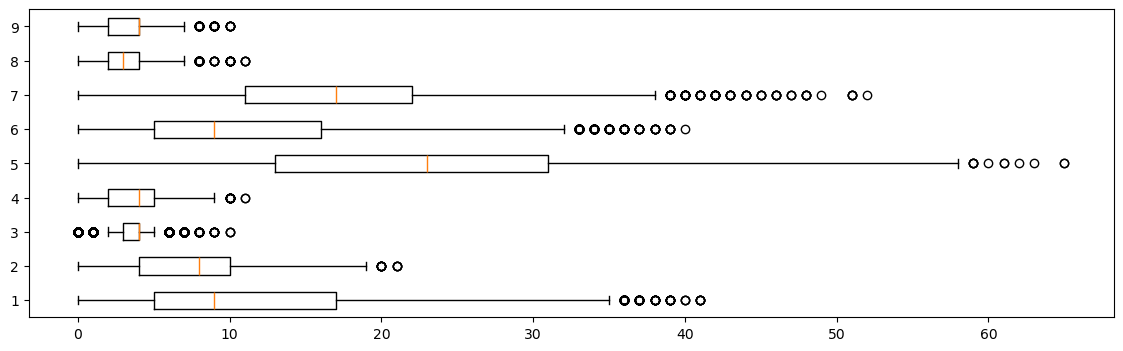

(106272, 1)


In [17]:
## boxlot 
d = abs(predicted-expected)
print(d.shape)

plt.figure(figsize = (14,4))
plt.boxplot(d, vert= False);
plt.show()


d = np.resize(d, (106272, 1))
print(d.shape)

### Grafico distribuzione errore complessivo

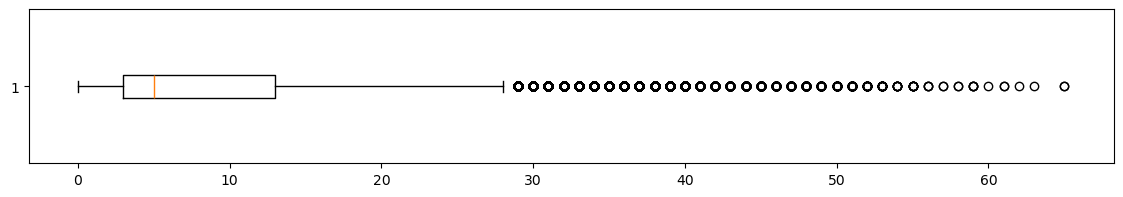

In [18]:
plt.figure(figsize = (14,2))
plt.boxplot(d, vert= False);
plt.show()